In [ ]:
#importing libraries
# Prashansa Evangeline Bonapalle. SJSU ID: 016678324
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [112]:
# Loading the data
sales_data=pd.read_csv("train_sales.csv")
sales_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [113]:
sales_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [114]:
sales_data.shape

(550068, 12)

In [115]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [116]:
sales_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

From the above we observe that we have null values for Age and Cabin columns.

## Calculating the null value percentage

In [117]:
null_perc= (sales_data.isnull().sum())/len(sales_data)*100
null_perc

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [118]:
#sales_data.describe
sales_data.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [119]:
for col in sales_data.columns:
    print(f"Number of unique values in {col}: {len(sales_data[col].unique())}")

Number of unique values in User_ID: 5891
Number of unique values in Product_ID: 3631
Number of unique values in Gender: 2
Number of unique values in Age: 7
Number of unique values in Occupation: 21
Number of unique values in City_Category: 3
Number of unique values in Stay_In_Current_City_Years: 5
Number of unique values in Marital_Status: 2
Number of unique values in Product_Category_1: 20
Number of unique values in Product_Category_2: 18
Number of unique values in Product_Category_3: 16
Number of unique values in Purchase: 18105


# **EDA - Target Variable : Purchase **

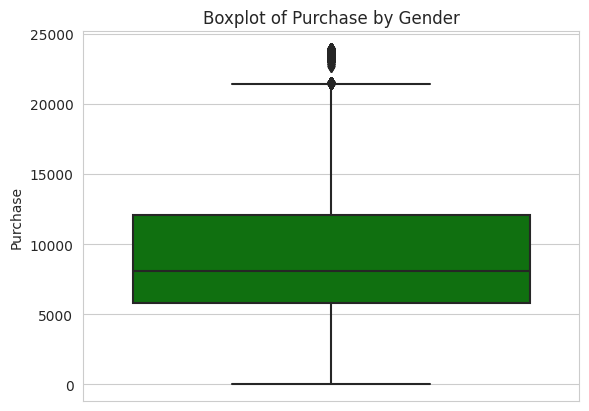

In [120]:
# plotting box plot
sns.boxplot(data=sales_data, y="Purchase", color='green')
plt.title("Boxplot of Purchase by Gender")
plt.show()

In [121]:
sales_data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [122]:
skew = sales_data["Purchase"].skew()
kurtosis = sales_data["Purchase"].kurtosis()
# Calculate the IQR of each variable
Q1 = sales_data.quantile(0.25)
Q3 =sales_data.quantile(0.75)
IQR = Q1-Q3
print("Skew :",skew)
print("Kurtosis :",kurtosis)
print("IQR:")
IQR

Skew : 0.6001400037087128
Kurtosis : -0.3383775655851702
IQR:


<ipython-input-122-73076914fe68>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = sales_data.quantile(0.25)
<ipython-input-122-73076914fe68>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 =sales_data.quantile(0.75)


User_ID              -2962.0
Occupation             -12.0
Marital_Status          -1.0
Product_Category_1      -7.0
Product_Category_2     -10.0
Product_Category_3      -7.0
Purchase             -6231.0
dtype: float64

In [123]:
# Identify outliers using the IQR method
outliers = ((sales_data < (Q1 - 1.5 * IQR)) | (sales_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the number of outliers and their indices
print("Number of outliers:", outliers.sum())

<ipython-input-123-7c95e8cbc067>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((sales_data < (Q1 - 1.5 * IQR)) | (sales_data > (Q3 + 1.5 * IQR))).any(axis=1)


Number of outliers: 550068


Right-skewed purchase distributions display multiple peaks. To correct this, log transformations can be applied to the purchase data.

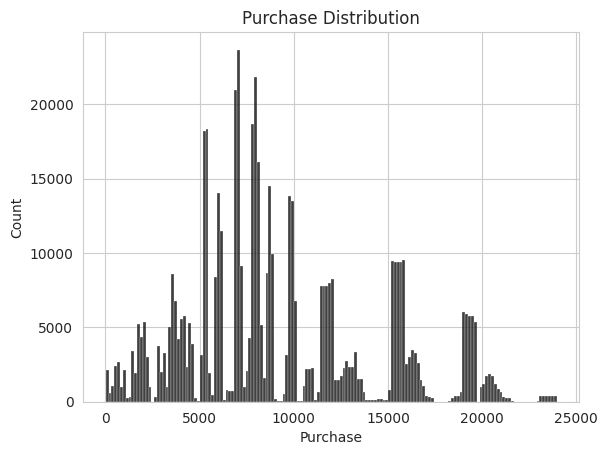

In [124]:
# Create a histogram of the Purchase distribution
sns.histplot(sales_data["Purchase"], color='black')
plt.title("Purchase Distribution")
plt.show()

Many customers repeat their purchase amount over time. This may be due to the large amount of products they purchase on Black Friday.

# **Gender**

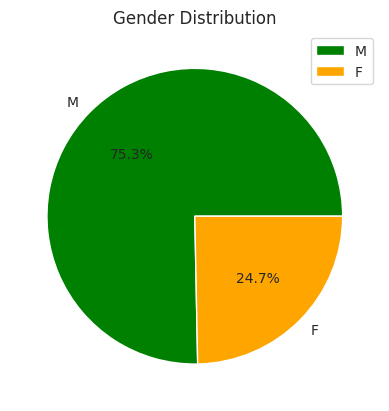

In [125]:

# Create a countplot of the Gender column
custom_colors = ["green", "orange"]

gender_counts = sales_data['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, colors=custom_colors, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.legend()
plt.show()

The above plot shows the no.of orders placed by Female and Male (gender)

In [126]:
sales_data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more number of purchases by Male rather than Females

<ipython-input-127-3c97ccf1de80>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby("Gender").mean()["Purchase"].plot(kind='bar',color= 'salmon')


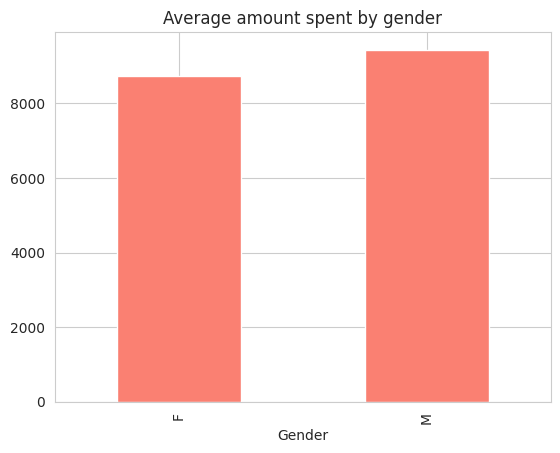

In [127]:
# Finding the mean value of the purchase attribute by gender
sales_data.groupby("Gender").mean()["Purchase"].plot(kind='bar',color= 'salmon')
plt.title("Average amount spent by gender")
plt.show()

A comparison of the total value of the purchases made by males and females shows that on average, men spend more money on purchases.

# **Marital Status**

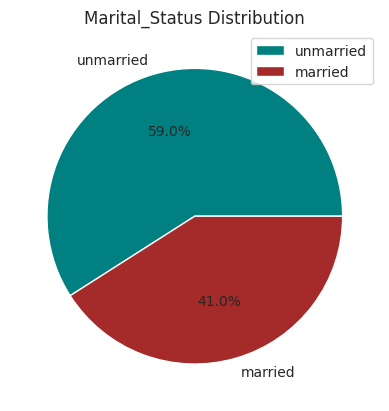

In [128]:
# Create a countplot of the Marital column
# Define custom colors
custom_colors = ["teal", "brown"]
label_dict = {0: 'unmarried', 1: 'married'}

marital_status_counts = sales_data['Marital_Status'].value_counts()

plt.pie(marital_status_counts, labels=label_dict.values(), colors=custom_colors, autopct='%1.1f%%')
plt.title("Marital_Status Distribution")
plt.legend(labels=[label_dict[0], label_dict[1]], loc = 'upper right')
plt.show()

*Considering* the above plot, we have more orders placed by Unmarried customers rather than Married customers

In [129]:
sales_data.groupby("Marital_Status").mean()["Purchase"]

<ipython-input-129-a1504924ac42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

<ipython-input-130-fdaf7246b8f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar',color ='salmon')


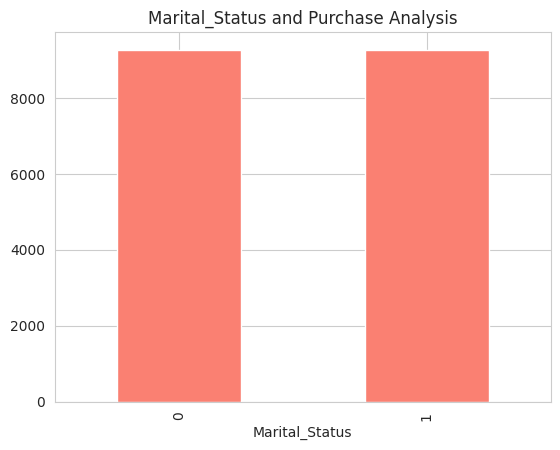

In [130]:
# Finding the mean value of the purchase attribute by gender
sales_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar',color ='salmon')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

It's interesting that married and unmarried consumers spend the same amount on purchases, despite the fact that unmarried consumers spend more than married consumers.


# **Occupation**

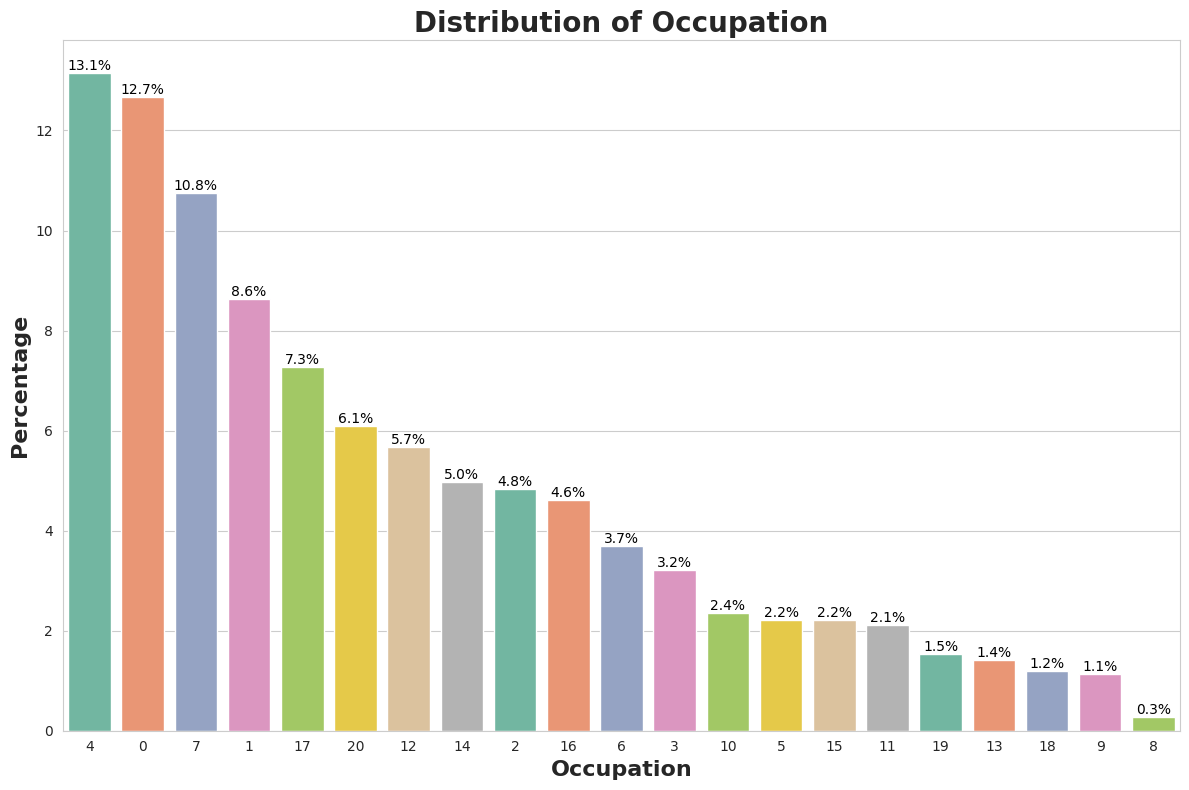

In [131]:
# Set the figure size and background color
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Calculate the counts and percentages of each occupation
occupation_counts = sales_data["Occupation"].value_counts()
occupation_percents = occupation_counts / occupation_counts.sum() * 100

# Create a bar plot with percentages on the y-axis
sns.barplot(x=occupation_counts.index, y=occupation_percents, palette="Set2", order=occupation_counts.index)

# Add annotations to the bars
for i, percent in enumerate(occupation_percents):
    plt.annotate(f"{percent:.1f}%", xy=(i, percent), ha="center", va="bottom", fontsize=10, color="black")

# Add a title, x-axis label, and y-axis label
plt.title("Distribution of Occupation", fontsize=20, fontweight="bold")
plt.xlabel("Occupation", fontsize=16, fontweight="bold")
plt.ylabel("Percentage", fontsize=16, fontweight="bold")

plt.tight_layout()

# Show the plot
plt.show()


The occupation variable has at least 20 distinct values. Because we are unable to identify which number belongs to which occupation, it's hard to conduct any analysis. Furthermore, there is no way to lower this quantity.

In [132]:
# Group the sales data by occupation and calculate the mean purchase value
occupation_purchase = sales_data.groupby("Occupation")["Purchase"].mean()

# Convert the result to a DataFrame and round the values to 2 decimal places
occupation_purchase_df = pd.DataFrame(occupation_purchase.round(2))

# Rename the column to "Mean Purchase"
occupation_purchase_df = occupation_purchase_df.rename(columns={"Purchase": "Mean Purchase"})

# Sort the data by mean purchase value in descending order
occupation_purchase_df = occupation_purchase_df.sort_values(by="Mean Purchase", ascending=False)

# Reset the index to include the occupation as a column
occupation_purchase_df = occupation_purchase_df.reset_index()

# Print the resulting DataFrame
print(occupation_purchase_df)


    Occupation  Mean Purchase
0           17        9821.48
1           12        9796.64
2           15        9778.89
3            8        9532.59
4           14        9500.70
5            7        9425.73
6           16        9394.46
7            5        9333.15
8           13        9306.35
9            6        9256.54
10           4        9213.98
11          11        9213.85
12           3        9178.59
13          18        9169.66
14           0        9124.43
15          10        8959.36
16           1        8953.19
17           2        8952.48
18          20        8836.49
19          19        8710.63
20           9        8637.74


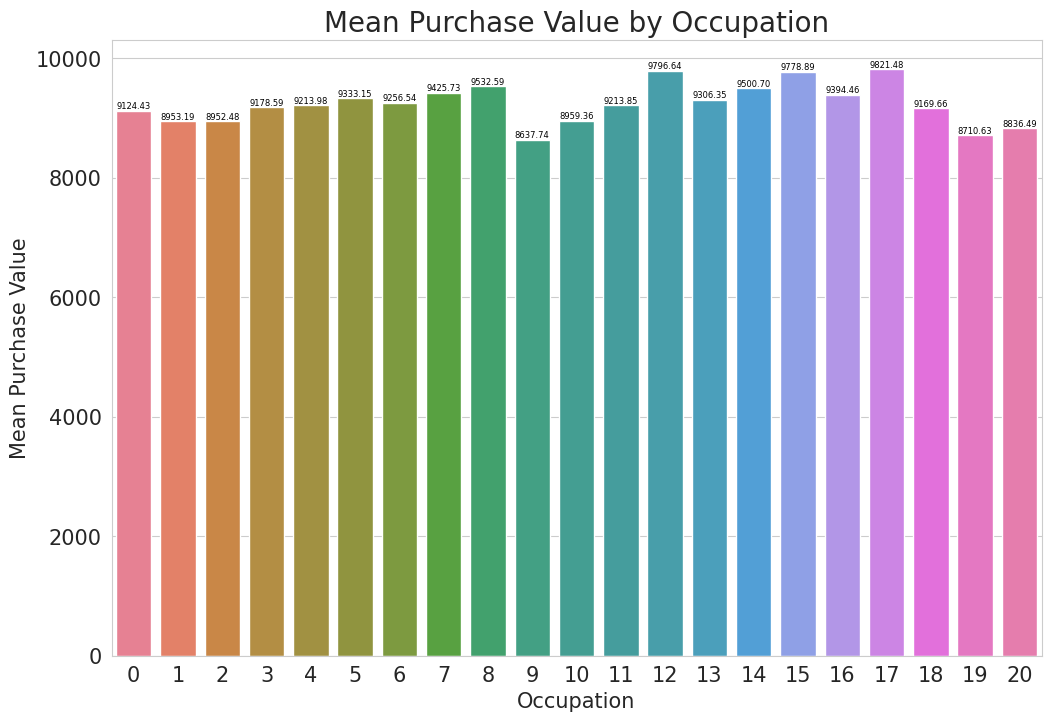

In [133]:
# Create a bar plot of mean purchase value by occupation
plt.figure(figsize=(12, 8))
sns.barplot(x="Occupation", y="Purchase", data=sales_data, estimator=lambda x: sum(x) / len(x), errorbar=None, palette="husl")



# Add a title, x-axis label, and y-axis label
plt.title("Mean Purchase Value by Occupation", fontsize=20)
plt.xlabel("Occupation", fontsize=15)
plt.ylabel("Mean Purchase Value", fontsize=15)

# Set the font size for the tick labels on both axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add annotations to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=6, color="black")

# Show the plot
plt.show()

Despite some occupations having a higher representation in the dataset, the average amount users spend appears to be roughly the same across all occupations. The occupations with the most representation tend to make the most purchases as a whole.

# **City Category** 

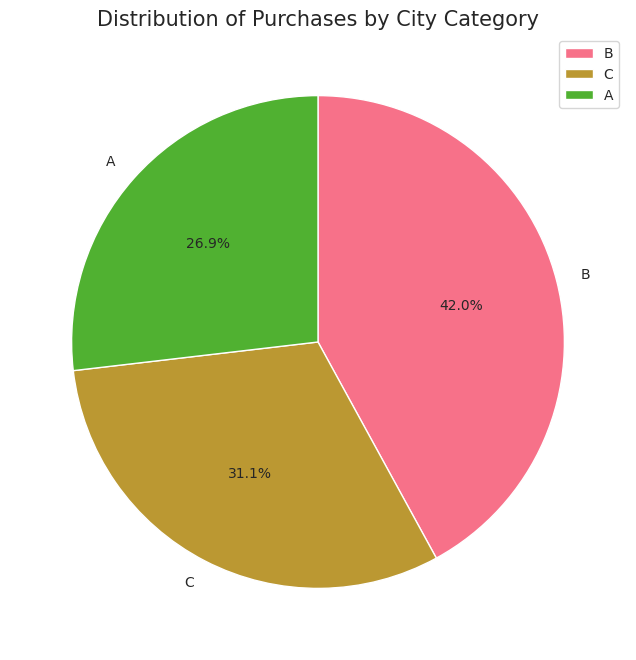

In [134]:
sns.set_palette('husl')

plt.figure(figsize=(10, 8))

# Calculate the value counts of each category
city_counts = sales_data["City_Category"].value_counts()

# Create a pie chart
plt.pie(city_counts, labels=city_counts.index, autopct="%.1f%%", startangle=90, counterclock=False)

# Add a title
plt.title("Distribution of Purchases by City Category", fontsize=15)
plt.legend()
plt.show()


The most number of purchases are recorded for city category B.

<ipython-input-135-40f972cd6767>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_purchase_df = sales_data.groupby("City_Category").mean()["Purchase"]


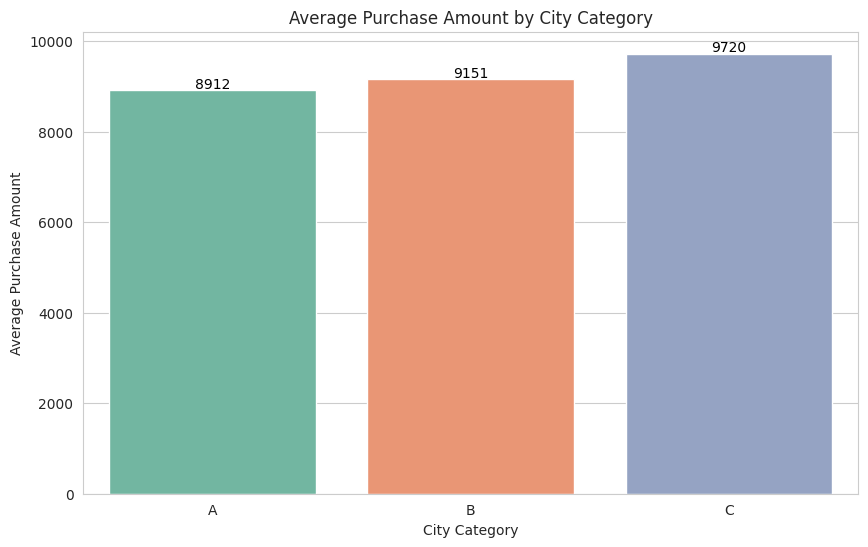

In [135]:
# Calculate the average purchase amount by city category using groupby and mean()
city_purchase_df = sales_data.groupby("City_Category").mean()["Purchase"]

# Create a bar plot of the average purchase amount by city category
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=city_purchase_df.index, y=city_purchase_df.values, palette="Set2", ax=ax)

# Add labels to the bars
for i, v in enumerate(city_purchase_df.values):
    ax.text(i, v + 50, "{:.0f}".format(v), color="black", ha="center")

# Add a title, x-axis label, and y-axis label
plt.title("Average Purchase Amount by City Category")
plt.xlabel("City Category")
plt.ylabel("Average Purchase Amount")
plt.show()


However, the city whose buyers spend the most is city type ‘C’.

# **Stay_In_Current_City_Years**

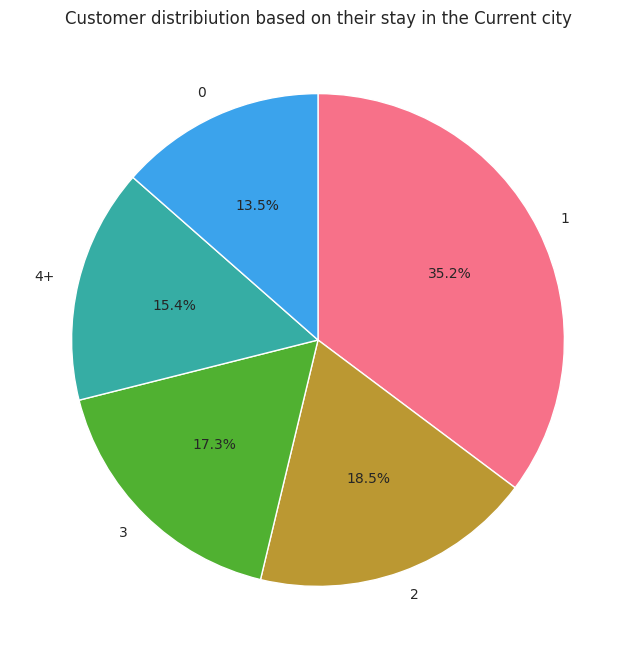

In [136]:
stay_count = sales_data['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(stay_count.values, labels=stay_count.index, autopct="%.1f%%", startangle=90, counterclock=False)

# Add a title
plt.title("Customer distribiution based on their stay in the Current city")

plt.show()


It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

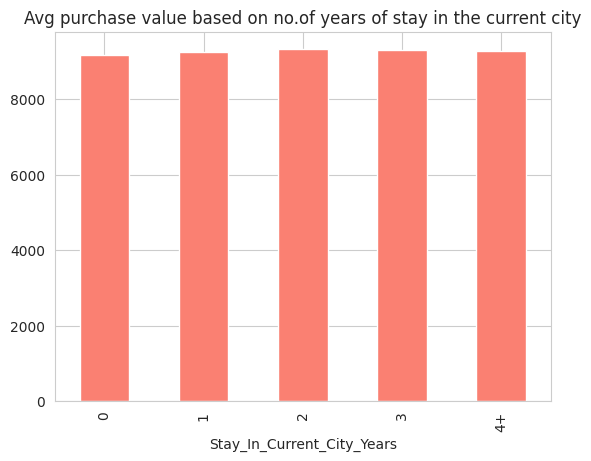

In [137]:
# Group the sales data by "Stay_In_Current_City_Years" and calculate the mean of "Purchase"
purchase_means = sales_data.groupby("Stay_In_Current_City_Years")["Purchase"].mean()

# Create a bar plot to visualize the mean purchase amount for each "Stay_In_Current_City_Years" group
purchase_means.plot(kind='bar',color ='salmon')

# Add a title to the plot
plt.title("Avg purchase value based on no.of years of stay in the current city")

# Display the plot
plt.show()


However, the city whose buyers spend the most is city type ‘C’.

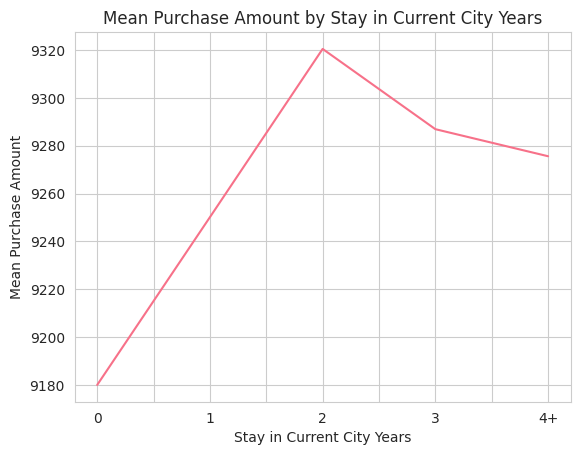

In [138]:

# group the data by 'Stay_In_Current_City_Years' and calculate the mean purchase amount
purchase_means = sales_data.groupby("Stay_In_Current_City_Years")["Purchase"].mean()

# plot the mean purchase amount for each value of 'Stay_In_Current_City_Years'
purchase_means.plot(kind='line')
plt.title("Mean Purchase Amount by Stay in Current City Years")
plt.xlabel("Stay in Current City Years")
plt.ylabel("Mean Purchase Amount")
plt.show()

The pattern is the same as before, indicating that on average, people spend the same amount regardless of their group on purchases. The majority of purchases are made by newcomers to a city, but when looked at individually, they tend to spend the same amount regardless of how many years they have been living there.

# **Age**

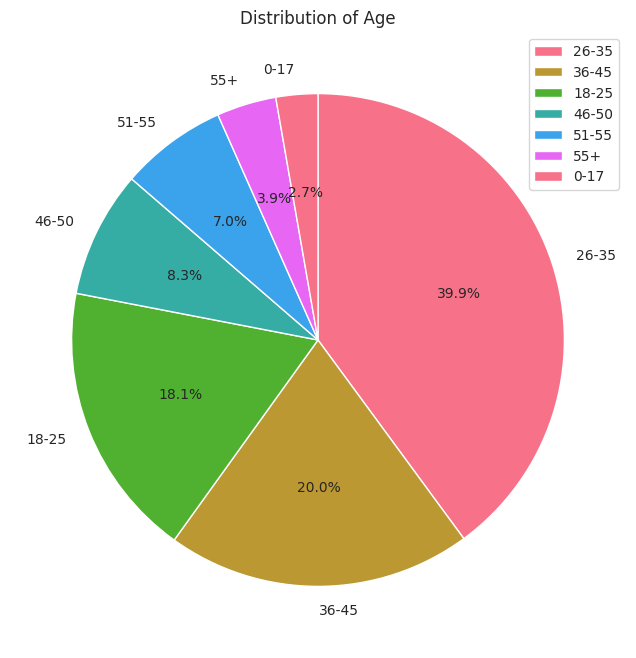

In [139]:
age_count = sales_data['Age'].value_counts()

plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(age_count.values, labels=age_count.index, autopct="%.1f%%", startangle=90, counterclock=False)

# Add a title
plt.title("Distribution of Age")
plt.legend()
plt.show()



Among the age bracket 26-35, most purchases are made.

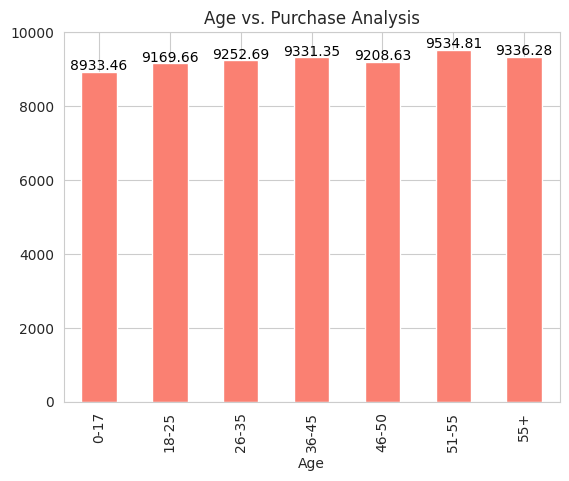

In [140]:
# Group the sales data by "Age" and calculate the mean of "Purchase"
purchase_means = sales_data.groupby("Age")["Purchase"].mean()

# Create a bar plot to visualize the mean purchase amount for each age group
ax = purchase_means.plot(kind='bar', color = 'salmon')

#Add value labels to the bars
for i, v in enumerate(purchase_means.values):
  ax.text(i, v + 50, "{:.2f}".format(v), color="black", ha="center", fontsize=10)

# Add a title to the plot
plt.title("Age vs. Purchase Analysis")

# Display the plot
plt.show()


The average purchase amount is a little higher for the 51-55 age group compared to the other age groups

Purchases are categorized based on age, with total amounts distributed accordingly.

# **Product_Category_1**

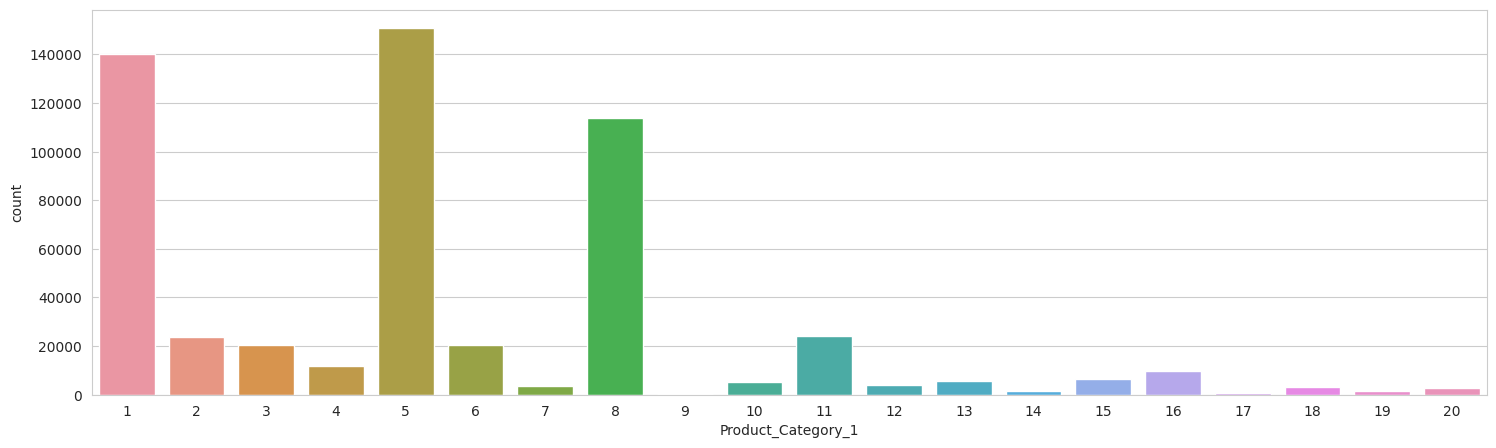

In [141]:

# Set the size of the plot
plt.figure(figsize=(18,5))

# Create a count plot to show the distribution of products in the sales data by Product Category 1
sns.countplot(x='Product_Category_1', data=sales_data)

# Show the plot
plt.show()


As each Product_Category_1 number is masked, it is unclear what product they represent.

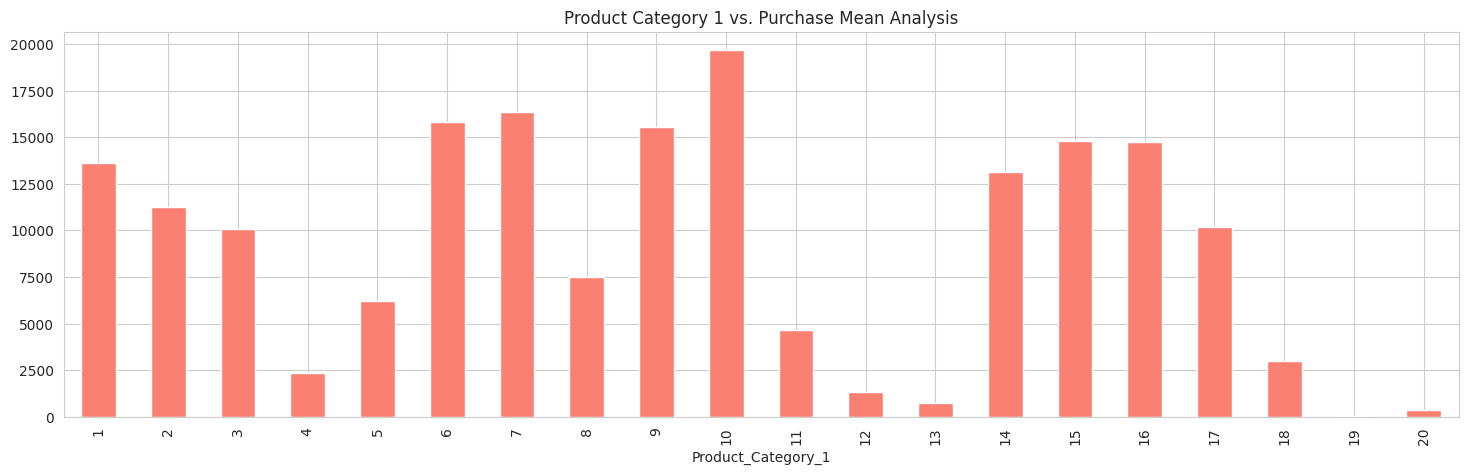

In [142]:
# Group the sales data by "Product_Category_1" and calculate the mean of "Purchase"
purchase_means = sales_data.groupby("Product_Category_1")["Purchase"].mean()

# Set the size of the plot
plt.figure(figsize=(18,5))

# Create a bar plot to visualize the mean purchase amount for each product category
purchase_means.plot(kind='bar', color='salmon')

# Add a title to the plot
plt.title("Product Category 1 vs. Purchase Mean Analysis")

# Show the plot
plt.show()


As can be seen by the average amount spent for Product_Category_1, despite there being more products purchased in categories 1,5,8, the average amount spent on those three products isn't the highest. The fact that other categories had high purchase values despite having minimal impact on sales is interesting.

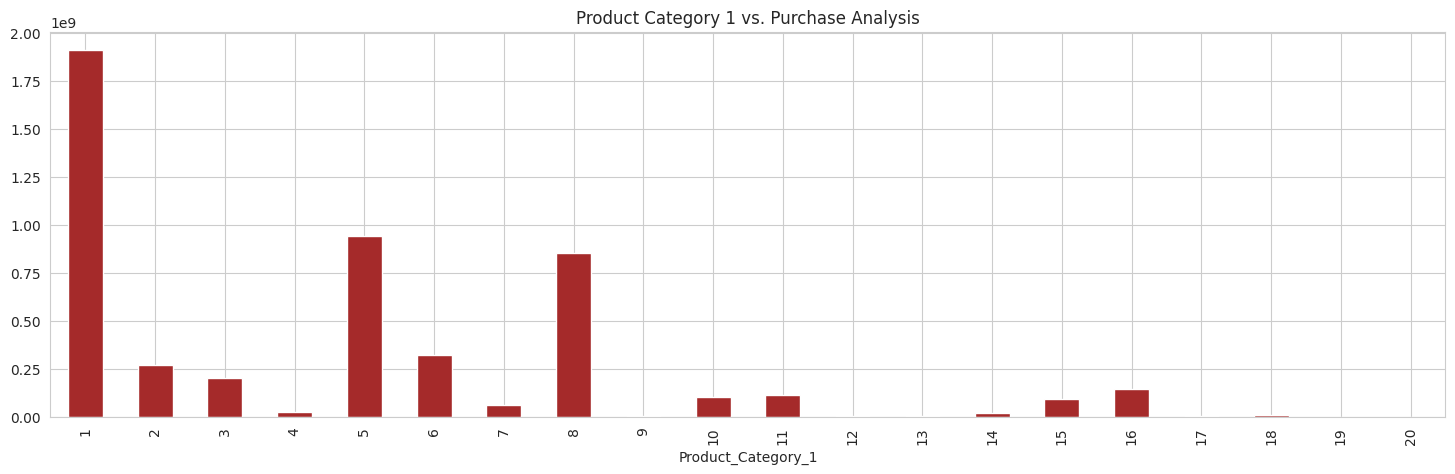

In [143]:
# Group the sales data by "Product_Category_1" and calculate the sum of "Purchase"
purchase_sums = sales_data.groupby("Product_Category_1")["Purchase"].sum()

# Set the size of the plot
plt.figure(figsize=(18,5))

# Create a bar plot to visualize the total purchase amount for each product category
purchase_sums.plot(kind='bar',color= 'brown')

# Add a title to the plot
plt.title("Product Category 1 vs. Purchase Analysis")

# Show the plot
plt.show()


The distribution we seen previously for this predictor appears here. For instance, due to the fact that those three products were three of the most popular, they have the highest sales sum.

# **Product_Category_2**

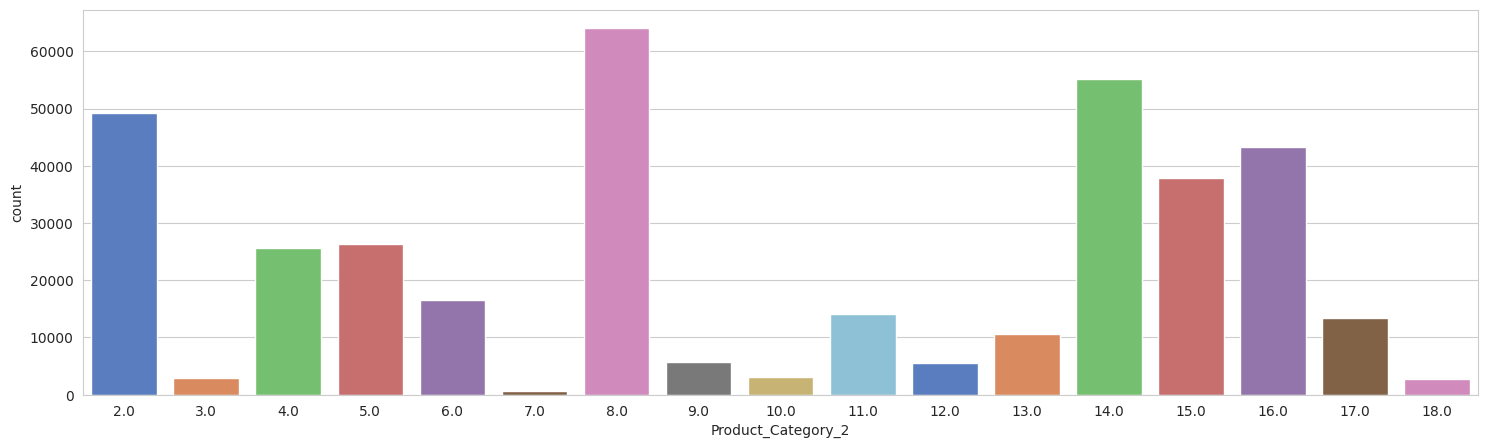

In [144]:
# visualize the count of values in the 'Product_Category_2' column
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_2', data=sales_data, palette='muted')
plt.show()


# **Product_Category_3**

<Axes: xlabel='Product_Category_3', ylabel='count'>

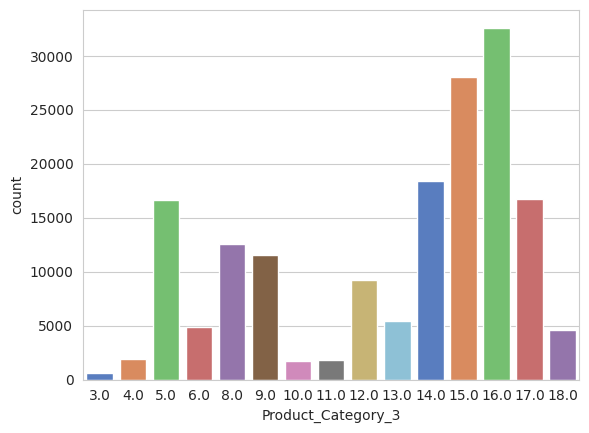

In [145]:
# create a countplot of the 'Product_Category_3' column
sns.countplot(data=sales_data, x='Product_Category_3',  palette='muted')

In [146]:
# compute the correlation matrix of the DataFrame
corr_matrix = sales_data.corr()
# print the correlation matrix
print(corr_matrix)

                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583            0.229678 -0.343703  
Prod

<ipython-input-146-e701e8fdde1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_data.corr()



# **HeatMap**

<ipython-input-147-aee5784702c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_data.corr()


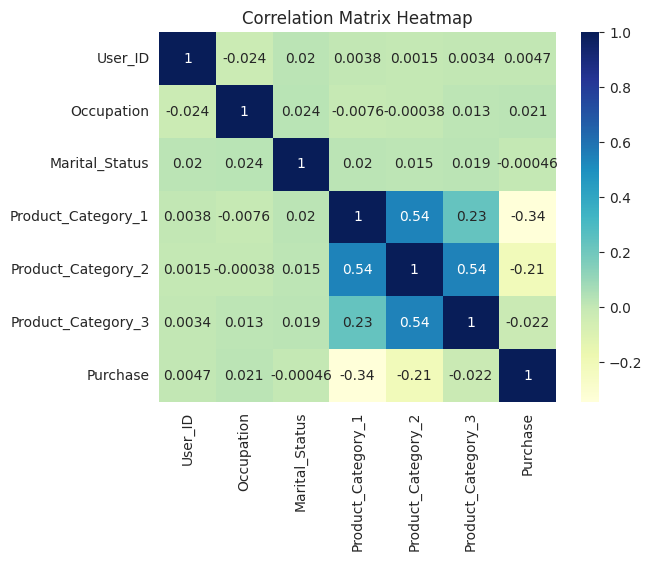

In [147]:
# compute the correlation matrix of the DataFrame
corr_matrix = sales_data.corr()

# create a heatmap of the correlation matrix
sns.heatmap(data=corr_matrix, annot=True,cmap='YlGnBu')
 

# set the title and display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


There is a some corellation between the product category groups.



In [148]:
sales_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [149]:
df = sales_data.copy()

In [150]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [151]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

**Encoding the categorical variables**

In [152]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,0,8,NaN,NaN,7969,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,20,NaN,NaN,368,0,1,0,0,0
550064,1006035,P00375436,F,26-35,1,C,0,20,NaN,NaN,371,0,0,0,1,0
550065,1006036,P00375436,F,26-35,15,B,1,20,NaN,NaN,137,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,0,20,NaN,NaN,365,0,0,1,0,0


In [153]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [154]:
df['Gender'] = LE.fit_transform(df['Gender'])

In [155]:
df['Age'] = LE.fit_transform(df['Age'])

In [156]:
df['City_Category'] = LE.fit_transform(df['City_Category'])

In [157]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [158]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [159]:
missing_values = df.isnull().sum()

print(missing_values)

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

 **Dropping irrelevant columns**

In [161]:
df = df.drop(["User_ID","Product_ID"],axis=1)

**Splitting data into independent and dependent variables**

In [162]:
# Splitting the data into input and target variables
X = df.drop("Purchase", axis=1)
y = df["Purchase"]
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


### **Modeling**

**Linear Regression**

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math



In [164]:
# Instantiate Linear Regression Model
lr = LinearRegression()

# Train the model using training data
lr.fit(X_train, y_train)

LinearRegression()

Intercept: 9536.400764131593
Coefficients: [ 465.82318446  112.36643445    5.05508596  314.06766138  -58.23217776
 -348.4514785    12.98415047  143.49190467  -20.83796687    5.4676518
   17.68367185   -3.96751734    1.65416056]


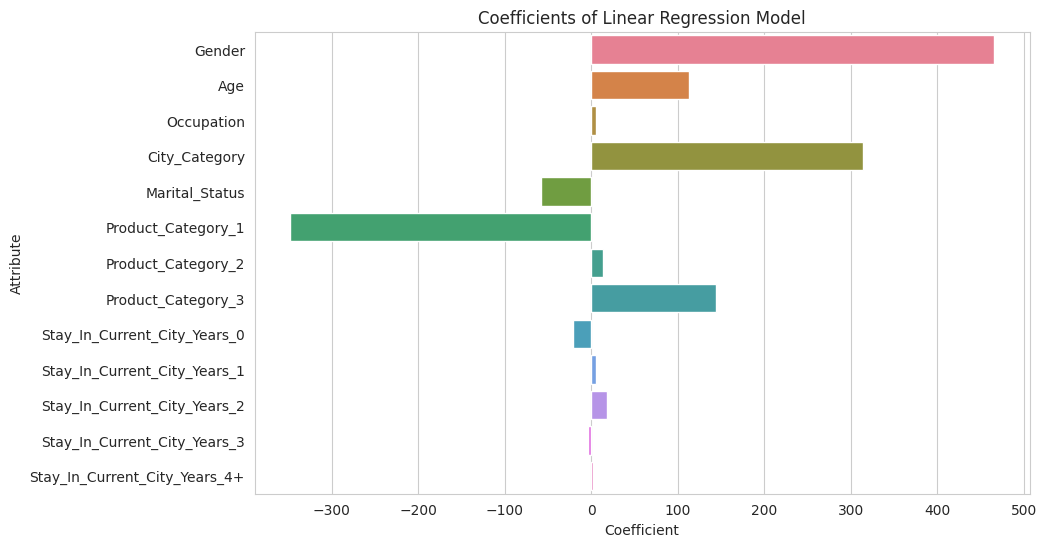

In [165]:
# Print the intercept and coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


# Define the palette
palette = "husl"

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=lr.coef_, y=X_train.columns, palette=palette)

# Add a title and labels
plt.title("Coefficients of Linear Regression Model")
plt.xlabel("Coefficient")
plt.ylabel("Attribute")

# Show the plot
plt.show()



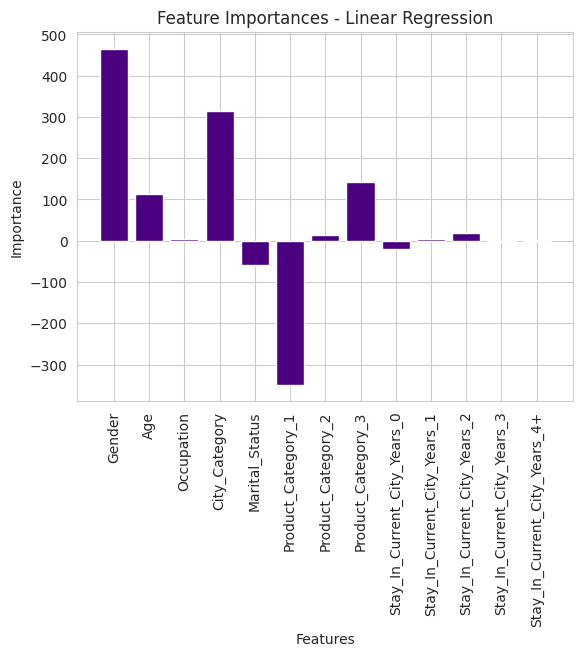

In [166]:
importances = lr.coef_

# create a bar plot of feature importances
plt.bar(range(len(importances)), importances , color = 'indigo')
plt.xticks(range(len(importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Linear Regression')
plt.show()

In [167]:
# Predict target values using the trained model
lr_y_pred = lr.predict(X_test)

# Evaluate the model's performance using various metrics
mae_lr = mean_absolute_error(y_test, lr_y_pred)
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
rmse_lr = math.sqrt(mse_lr)

print("Mean Absolute Error:", mae_lr)
print("")
print("Mean Squared Error:", mse_lr)
print("")
print("R2 Score:", r2_lr)
print("")
print("Root Mean Squared Error:", round(rmse_lr, 2))


Mean Absolute Error: 3532.069226165843

Mean Squared Error: 21397853.26940751

R2 Score: 0.15192944521481688

Root Mean Squared Error: 4625.78


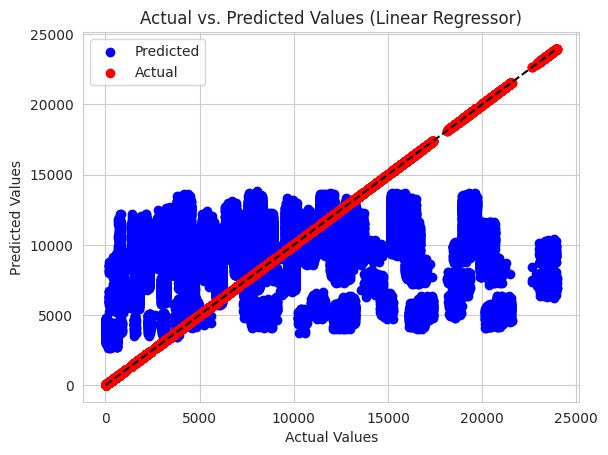

In [168]:
# create scatter plot of actual vs. predicted values
plt.scatter(y_test, lr_y_pred, color='blue', label='Predicted')

# add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')

# add scatter plot of actual values
plt.scatter(y_test, y_test, color='red', label='Actual')

# set axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regressor)')

# show legend
plt.legend()

# show the plot
plt.show()


### **DecisionTreeRegressor**

In [169]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
dt_regressor = DecisionTreeRegressor(random_state = 0)  
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

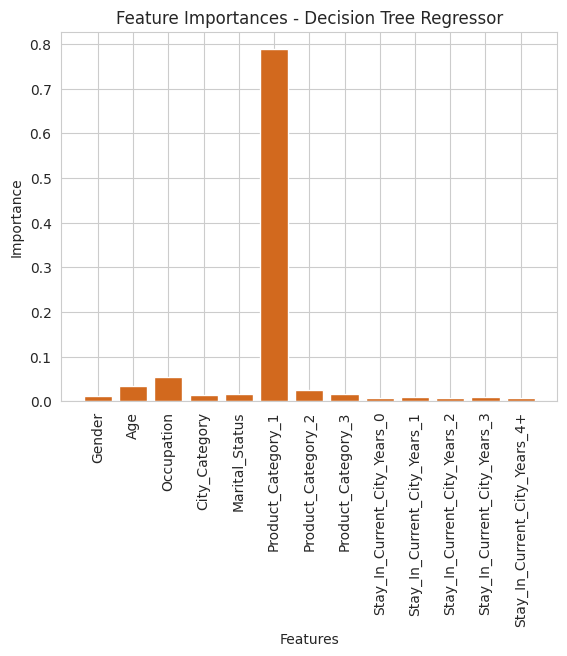

In [170]:
# get feature importances
importances = dt_regressor.feature_importances_

# create a bar plot of feature importances
plt.bar(range(len(importances)), importances, color='chocolate')
plt.xticks(range(len(importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Decision Tree Regressor')
plt.show()


In [171]:
# predict the test set results
dt_y_pred = dt_regressor.predict(X_test)

# calculate mean absolute error
mae_dt = mean_absolute_error(y_test, dt_y_pred)

# calculate mean squared error
mse_dt = mean_squared_error(y_test, dt_y_pred)

# calculate R-squared score
r2_dt = r2_score(y_test, dt_y_pred)

# calculate root mean squared error
rmse_dt = math.sqrt(mse_dt)

# print results
print("Decision Tree Regressor:")
print("Mean Absolute Error: ", mae_dt)
print("Mean Squared Error: ", mse_dt)
print("R-squared Score: ", r2_dt)
print("Root Mean Squared Error: ", rmse_dt)

Decision Tree Regressor:
Mean Absolute Error:  2372.0357559134654
Mean Squared Error:  11300579.466797074
R-squared Score:  0.5521191505924365
Root Mean Squared Error:  3361.633452177241


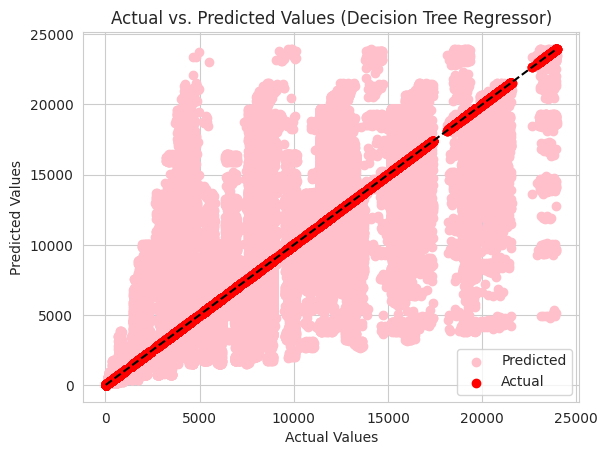

In [172]:

# create scatter plot of actual vs. predicted values
plt.scatter(y_test, dt_y_pred, color='pink', label='Predicted')

# add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')

# add scatter plot of actual values
plt.scatter(y_test, y_test, color='red', label='Actual')

# set axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree Regressor)')

# show legend
plt.legend()

# show the plot
plt.show()


### **Random Forest Regressor**

In [173]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
# create a regressor object 
rf_regressor = RandomForestRegressor(random_state = 0)  

In [174]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

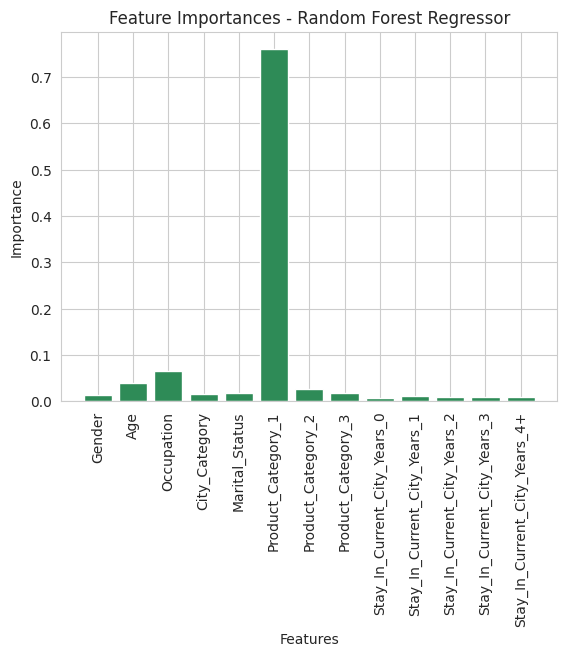

In [175]:
# get feature importances
importances = rf_regressor.feature_importances_

# create a bar plot of feature importances
plt.bar(range(len(importances)), importances,color = 'seagreen')
plt.xticks(range(len(importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Regressor')
plt.show()

In [176]:
rf_y_pred = rf_regressor.predict(X_test)
MAE_random = mean_absolute_error(y_test, rf_y_pred)
print("Mean Absolute Error :",MAE_random)
MSE_random = mean_squared_error(y_test, rf_y_pred)
print("Mean Squared Error :",MSE_random)
R2_Score_random = r2_score(y_test, rf_y_pred)
print("R2 Score : ", R2_Score_random)
RMSE_random = sqrt(mean_squared_error(y_test, rf_y_pred))
print("RMSE of Linear Regression Model is ",RMSE_random)

Mean Absolute Error : 2222.049109204734
Mean Squared Error : 9310769.87311957
R2 Score :  0.6309821516972987
RMSE of Linear Regression Model is  3051.35541573242


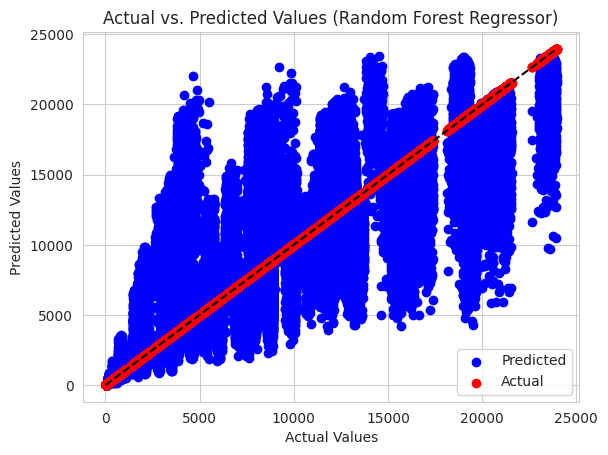

In [177]:
# create scatter plot of actual vs. predicted values
plt.scatter(y_test, rf_y_pred, color='blue', label='Predicted')

# add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')

# add scatter plot of actual values
plt.scatter(y_test, y_test, color='red', label='Actual')

# set axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')

# show legend
plt.legend()

# show the plot
plt.show()


### **XGBoost Regressor**

### Here we are training an XGBoost Regressor with a learning rate of 0.1, maximum depth of 5, minimum child weight of 1, and a random seed of 42. We then fit this model to our training data using the `fit()` method.

In [178]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=1, seed=42)




In [179]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

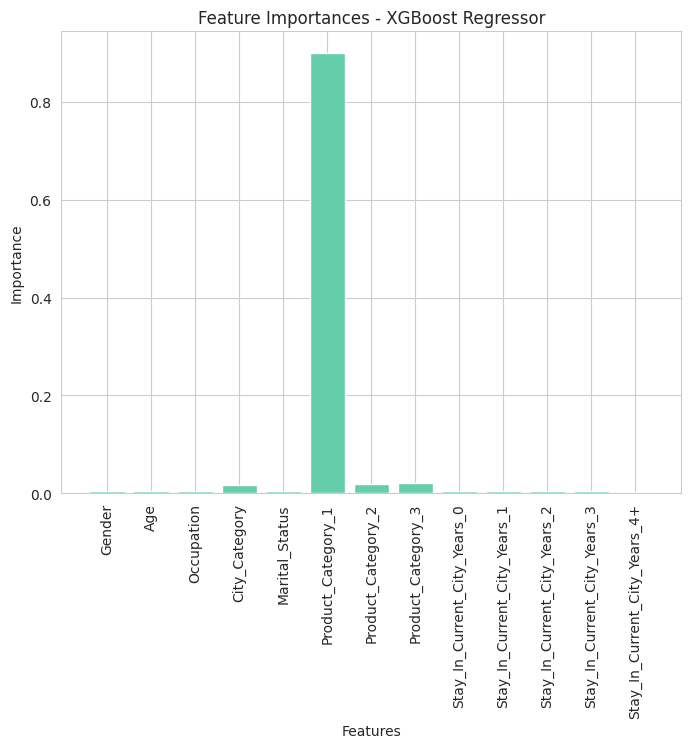

In [186]:
# plot feature importances
plt.figure(figsize=(8,6))
ax = plt.gca()
xgb_reg_feature_importances = xgb_reg.feature_importances_
plt.bar(range(len(xgb_reg_feature_importances)), xgb_reg_feature_importances ,color="mediumaquamarine")
plt.xticks(range(len(xgb_reg_feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost Regressor')
plt.show()

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
xgb_y_pred = xgb_reg.predict(X_test)


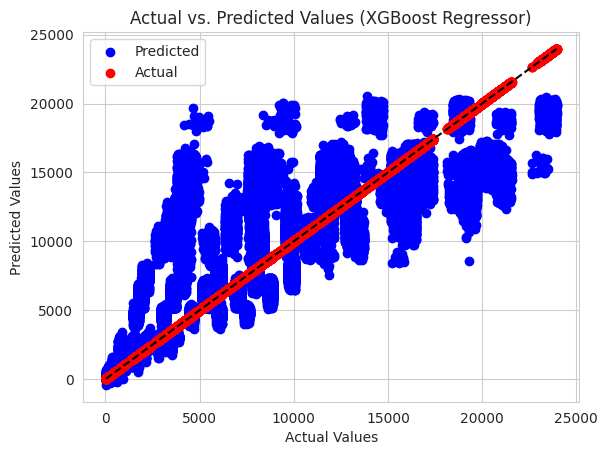

In [190]:
# create scatter plot of actual vs. predicted values
plt.scatter(y_test, xgb_y_pred, color='blue', label='Predicted')

# add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')

# add scatter plot of actual values
plt.scatter(y_test, y_test, color='red', label='Actual')

# set axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost Regressor)')

# show legend
plt.legend()

# show the plot
plt.show()


In [187]:
mse_xg = mean_squared_error(y_test, xgb_y_pred)
mae_xg = mean_absolute_error(y_test, xgb_y_pred)
r2_xg = r2_score(y_test, xgb_y_pred)
rmse_xg = np.sqrt(mse_xg)

print("Mean Squared Error (MSE): ", mse_xg)
print("Mean Absolute Error (MAE): ", mae_xg)
print("R-squared (R2): ", r2_xg)
print("Root Mean Squared Error (RMSE): ", rmse_xg)

Mean Squared Error (MSE):  8553036.108839238
Mean Absolute Error (MAE):  2202.242240341369
R-squared (R2):  0.6610137481271811
Root Mean Squared Error (RMSE):  2924.5574210193304


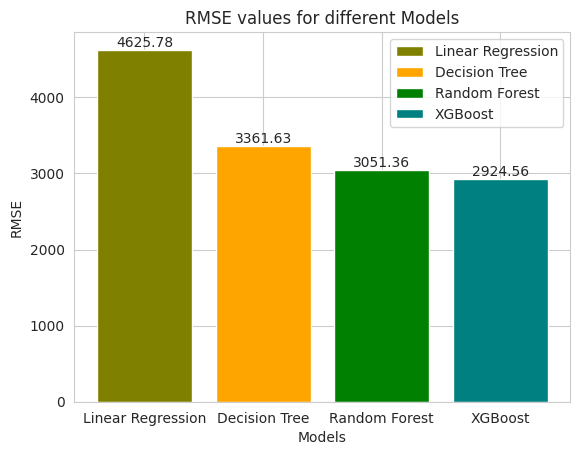

In [189]:
RMSE = [rmse_lr, rmse_dt, RMSE_random, rmse_xg]
models = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"]
colors = ['olive','orange','green','teal']

fig, ax = plt.subplots()
bars = ax.bar(models, RMSE, color=colors)
ax.set_xlabel("Models")
ax.set_ylabel("RMSE")
ax.set_title("RMSE values for different Models")
ax.legend(bars, models)
# add labels to bars
for i, v in enumerate(RMSE):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()